In [10]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns


In [11]:
df=pd.read_csv("mushrooms.csv")

In [12]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


In [13]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [14]:
print(f"Dataset shape: {df.shape}")

Dataset shape: (8124, 23)


In [15]:
print(f"Target Distribution:\n {df['class'].value_counts()}")

Target Distribution:
 class
e    4208
p    3916
Name: count, dtype: int64


# Exploratory Data Analysis

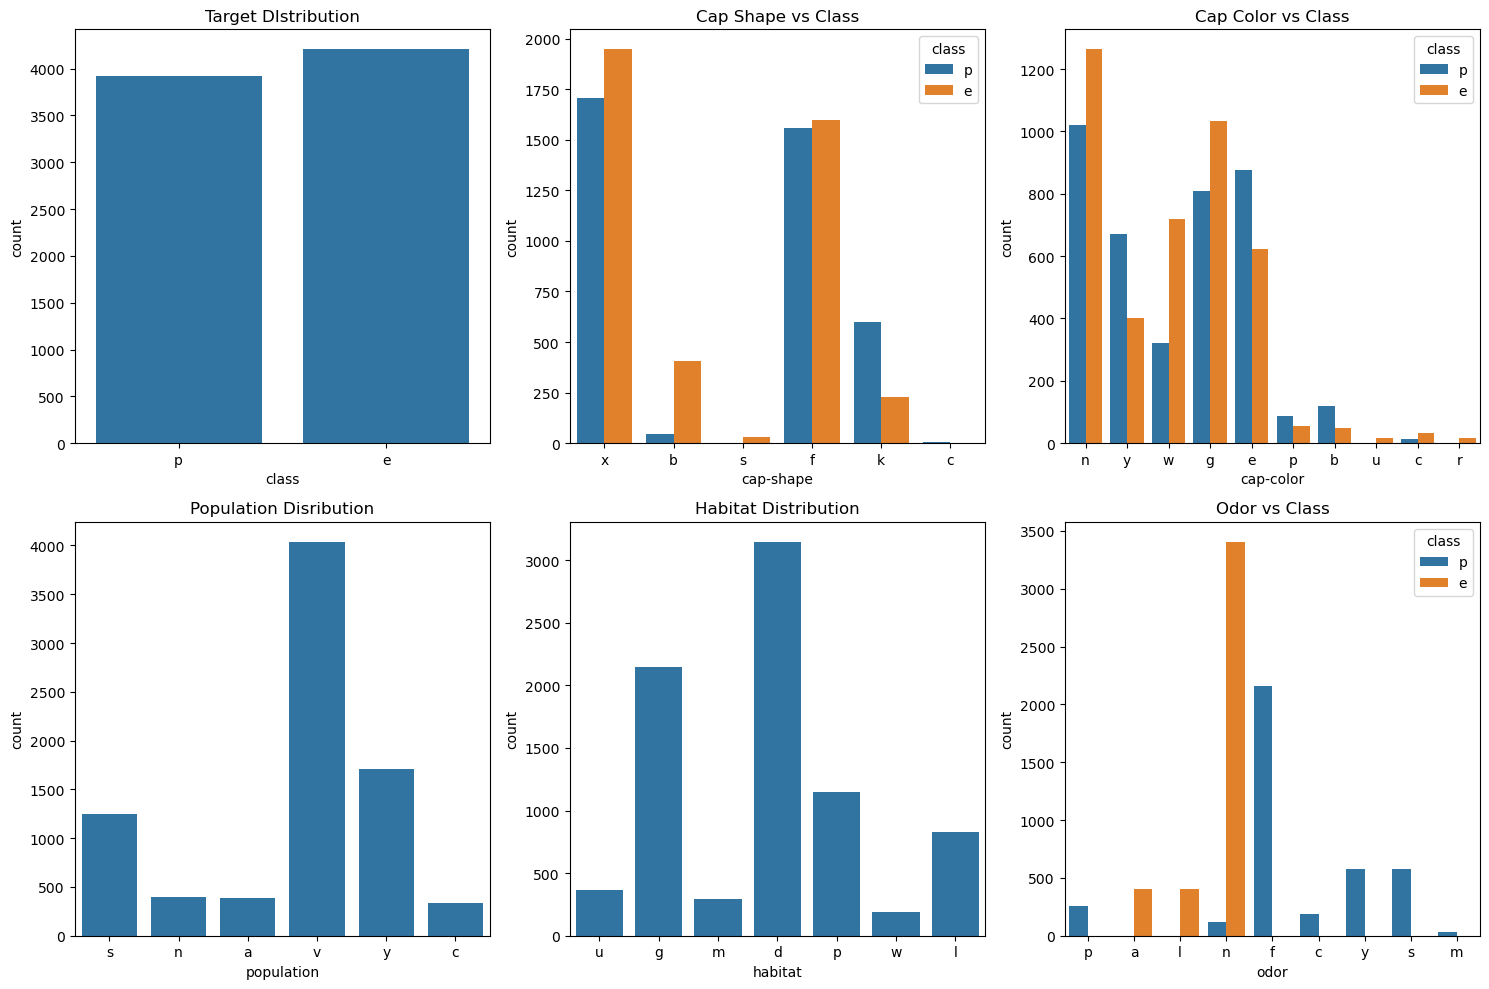

In [22]:
plt.figure(figsize=(15,10))
plt.subplot(2,3,1)
sns.countplot(data=df, x='class')
plt.title("Target DIstribution")

plt.subplot(2,3,2)
sns.countplot(data=df, x='cap-shape', hue='class')
plt.title("Cap Shape vs Class")
plt.subplot(2,3,3)
sns.countplot(data=df,  x='cap-color',hue='class')
plt.title("Cap Color vs Class")
plt.subplot(2,3,4)
sns.countplot(data=df, x='population')
plt.title("Population Disribution")
plt.subplot(2,3,5)
sns.countplot(data=df,x='habitat')
plt.title("Habitat Distribution")
plt.subplot(2,3,6)
sns.countplot(data=df, x='odor',hue='class')
plt.title("Odor vs Class")
plt.tight_layout()
plt.show()

# Data PreProcessing

In [23]:
df_features=df.drop('class',axis=1)
df_labels=df['class']

In [27]:
from sklearn.preprocessing import OrdinalEncoder
encoder=OrdinalEncoder()
mushroom_prepared=encoder.fit_transform(df_features)
mushroom_df=pd.DataFrame(mushroom_prepared,columns=df_features.columns)

In [29]:
k_clust=KMeans(n_clusters=2, random_state=42)

k_clust.fit(mushroom_df)



KMeans(n_clusters=2, random_state=42)

In [31]:
k_labels=k_clust.labels_

In [32]:
k_labels

array([0, 0, 0, ..., 0, 1, 0], dtype=int32)

In [33]:
map_dict={'e':0, 'p':1}
true_labels=df_labels.map(map_dict)

In [35]:
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy=accuracy_score(true_labels, k_labels)
print(f"KMeans Accuracy: {accuracy:.4f}")

KMeans Accuracy: 0.7090


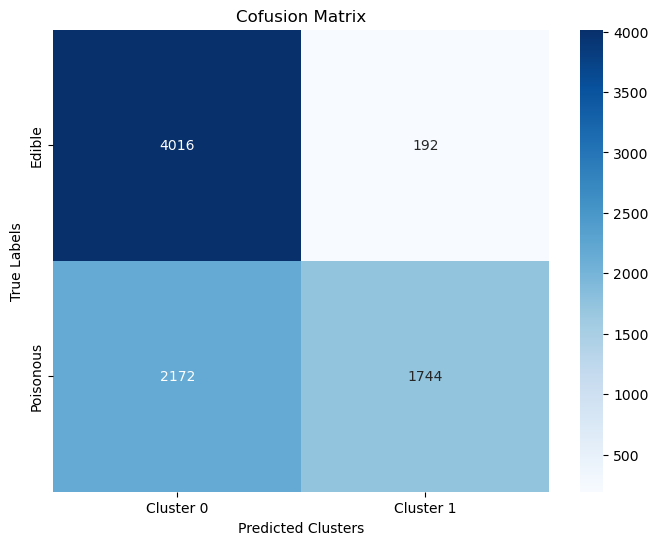

In [37]:
plt.figure(figsize=(8,6))
cm=confusion_matrix(true_labels,k_labels)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
           xticklabels=['Cluster 0', 'Cluster 1'],
           yticklabels=['Edible', 'Poisonous'])

plt.title("Cofusion Matrix")
plt.xlabel("Predicted Clusters")
plt.ylabel("True Labels")
plt.show()


In [38]:
from sklearn.metrics import classification_report
print("Classification Report: ")
print(classification_report(true_labels,k_labels, target_names=['Edible','Poisonous']))

Classification Report: 
              precision    recall  f1-score   support

      Edible       0.65      0.95      0.77      4208
   Poisonous       0.90      0.45      0.60      3916

    accuracy                           0.71      8124
   macro avg       0.77      0.70      0.68      8124
weighted avg       0.77      0.71      0.69      8124



# Unsupervised Learning

In [43]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Step 1: Load the dataset
data = pd.read_csv("mushrooms.csv")


In [44]:
 # Display first few rows
print("Dataset Preview:")
print(data.head())



Dataset Preview:
  class cap-shape cap-surface cap-color bruises  ... ring-number ring-type spore-print-color population habitat
0     p         x           s         n       t  ...           o         p                 k          s       u
1     e         x           s         y       t  ...           o         p                 n          n       g
2     e         b           s         w       t  ...           o         p                 n          n       m
3     p         x           y         w       t  ...           o         p                 k          s       u
4     e         x           s         g       f  ...           o         e                 n          a       g

[5 rows x 23 columns]


In [45]:

# Step 2: Check for missing values
print("\nMissing Values in Each Column:")
print(data.isnull().sum())




Missing Values in Each Column:
class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64


In [46]:
# Step 3: Encode categorical features (if any)
label_encoders = {}
for column in data.columns:
    if data[column].dtype == 'object':
        le = LabelEncoder()
        data[column] = le.fit_transform(data[column])
        label_encoders[column] = le

In [50]:
# Step 4: Apply K-Means Clustering
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans.fit_predict(data)

# Step 5: Display cluster centers and counts
print("\nCluster Centers:\n", kmeans.cluster_centers_)






Cluster Centers:
 [[ 2.17171717e-01  3.34371493e+00  1.67171717e+00  3.76627385e+00
   7.05948373e-01  4.34062851e+00  9.43322110e-01  1.37485971e-01
   1.32996633e-01  8.02441077e+00  5.84736251e-01  1.18237935e+00
   1.80190797e+00  1.85353535e+00  5.72727273e+00  5.67789001e+00
   0.00000000e+00  1.92480359e+00  1.09764310e+00  3.47923681e+00
   3.05274972e+00  3.80836139e+00  1.03703704e+00 -2.40918396e-14]
 [ 9.23607427e-01  3.29973475e+00  2.46206897e+00  2.97984085e+00
   5.78249337e-02  5.61114058e+00  1.00000000e+00  2.54641910e-02
   9.16710875e-01  1.15649867e-01  9.16710875e-01  6.89655172e-03
   1.52891247e+00  1.52891247e+00  6.41432361e+00  6.41432361e+00
   0.00000000e+00  2.00000000e+00  1.08328912e+00  1.29442971e-01
   6.98620690e+00  3.80901857e+00  2.17984085e+00  1.00000000e+00]
 [ 5.23738318e-01  3.38803738e+00  1.58841121e+00  6.56299065e+00
   2.80747664e-01  2.85046729e+00  9.97009346e-01  2.89345794e-01
   1.15887850e-01  3.83738318e+00  2.97570093e-01  1.79

In [51]:
print("\nCluster Counts:\n", data['Cluster'].value_counts())


Cluster Counts:
 Cluster
0    3564
2    2675
1    1885
Name: count, dtype: int64


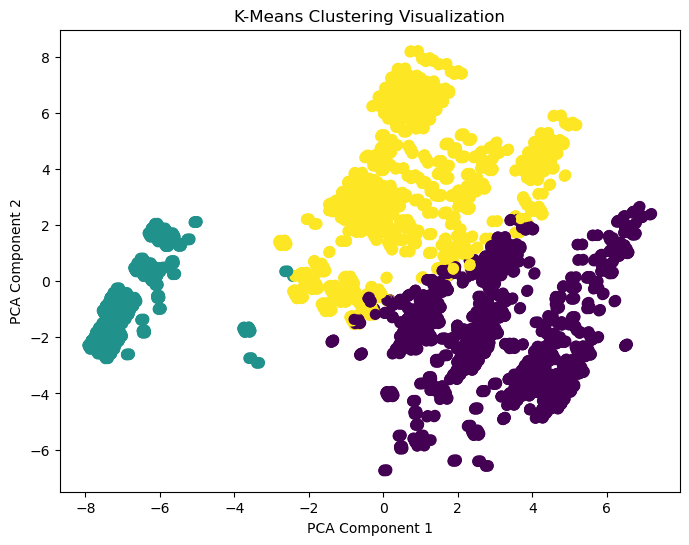

In [55]:
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(data.drop('Cluster', axis=1))

plt.figure(figsize=(8,6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1],
            c=data['Cluster'], cmap='viridis', s=50)
plt.title('K-Means Clustering Visualization')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()